In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
response = requests.get("https://jsonplaceholder.typicode.com/todos")
todos = json.loads(response.text)


In [3]:
todos_by_user = {}
counter = 0
for todo in todos:
    # here "todo" corresponds to each of the single elements in the json file
    # counter +=1
    # print(todo["completed"], counter)
    # there are 200 elements 
    if todo["completed"]:
        try:
            todos_by_user[todo["userId"]]+=1
        except KeyError:
            todos_by_user[todo["userId"]]=1
        


In [4]:
todos_by_user

{1: 11, 2: 8, 3: 7, 4: 6, 5: 12, 6: 6, 7: 9, 8: 11, 9: 8, 10: 12}

In [5]:
top_users = sorted(todos_by_user.items(), key= lambda item: item[1], reverse= True)
print(top_users)

[(5, 12), (10, 12), (1, 11), (8, 11), (7, 9), (2, 8), (9, 8), (3, 7), (4, 6), (6, 6)]


In [6]:
max_complete = top_users[0][1]
print(max_complete)

12


In [7]:
users = []
for user, num_complete in top_users:
    if num_complete < max_complete:
        break
    users.append(str(user))

max_users = " and ".join(users)

In [8]:
print(users)
print(max_users)

['5', '10']
5 and 10


In [9]:
for todo in todos:
    print(todo['title'])

delectus aut autem
quis ut nam facilis et officia qui
fugiat veniam minus
et porro tempora
laboriosam mollitia et enim quasi adipisci quia provident illum
qui ullam ratione quibusdam voluptatem quia omnis
illo expedita consequatur quia in
quo adipisci enim quam ut ab
molestiae perspiciatis ipsa
illo est ratione doloremque quia maiores aut
vero rerum temporibus dolor
ipsa repellendus fugit nisi
et doloremque nulla
repellendus sunt dolores architecto voluptatum
ab voluptatum amet voluptas
accusamus eos facilis sint et aut voluptatem
quo laboriosam deleniti aut qui
dolorum est consequatur ea mollitia in culpa
molestiae ipsa aut voluptatibus pariatur dolor nihil
ullam nobis libero sapiente ad optio sint
suscipit repellat esse quibusdam voluptatem incidunt
distinctio vitae autem nihil ut molestias quo
et itaque necessitatibus maxime molestiae qui quas velit
adipisci non ad dicta qui amet quaerat doloribus ea
voluptas quo tenetur perspiciatis explicabo natus
aliquam aut quasi
veritatis paria

In [10]:
rel = {'Complete': 0, 'NComplete': 0}
for tod in todos:
    if tod['completed'] == False:
        rel['NComplete']+=1
    elif tod['completed'] == True:
        rel['Complete']+=1
 

In [11]:
rel

{'Complete': 90, 'NComplete': 110}

In [13]:
tasks=list(rel.keys())
values=list(rel.values())
total=np.sum(np.array(values))
rel_val=values/total

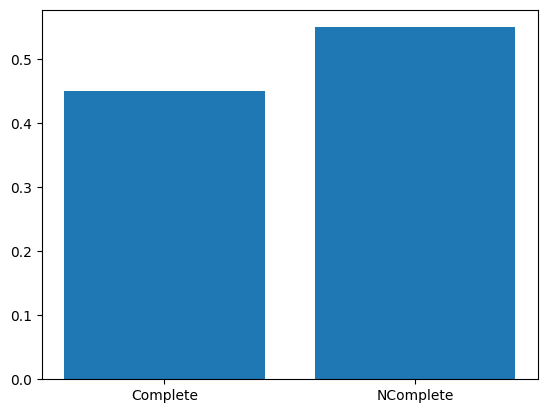

In [15]:
plt.bar(tasks,rel_val)
plt.show()